In [42]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as MAE

In [2]:
df = pd.read_csv('IQDS_interpol_30.csv')

In [7]:
X = np.array(df[df.columns[2]])
X = X[109855 - 720 * 5: 109855 + 720 * 3]
y = np.array(df[df.columns[2]])
X_train = np.zeros((720, 8))
X_test = np.zeros((720, 3))
h = 0
for i in range(0, len(X), 720):
    for k, j in enumerate(X[i:i + 720]):
        X_train[k, h ] = j   
    h += 1
    
X = np.array(df[df.columns[2]])    
X = X[109855 - 720: 109855 +720 * 2]
h = 0
for i in range(0, len(X), 720):
    print(h)
    for k, j in enumerate(X[i:i + 720]):
        X_test[k, h ] = j 
    h += 1

0
1
2


In [9]:
X_test

array([[330.00000985, 330.00000985, 339.99999869],
       [329.9999953 , 319.99999192, 339.99999869],
       [329.9999953 , 350.00000207, 339.99999869],
       ...,
       [299.9999997 , 309.99998853, 350.00000207],
       [319.99999192, 320.00000647, 339.99999869],
       [329.9999953 , 339.99999869, 330.00000985]])

In [10]:
U,S,Vt = np.linalg.svd(X_train, full_matrices=False)

In [11]:
X = np.array(df[df.columns[2]])[109855 - 720 * 5: 109855 + 720 * 3]
X_test = np.zeros((720, 8))
h = 0
for i in range(0, len(X), 720):
    for k, j in enumerate(X[i:i + 720]):
        X_test[k, h ] = j   
    h += 1

Кол-во чисел  1
(720, 8)


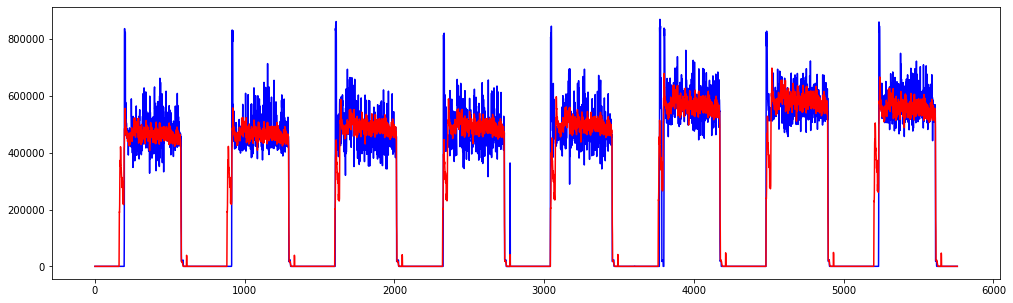

Кол-во чисел  2
(720, 8)


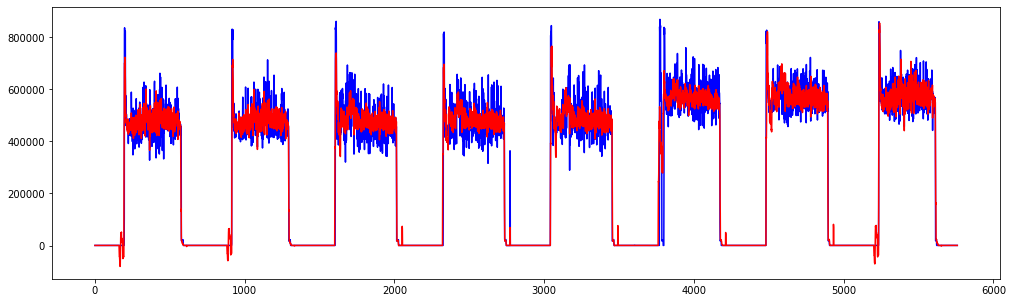

Кол-во чисел  3
(720, 8)


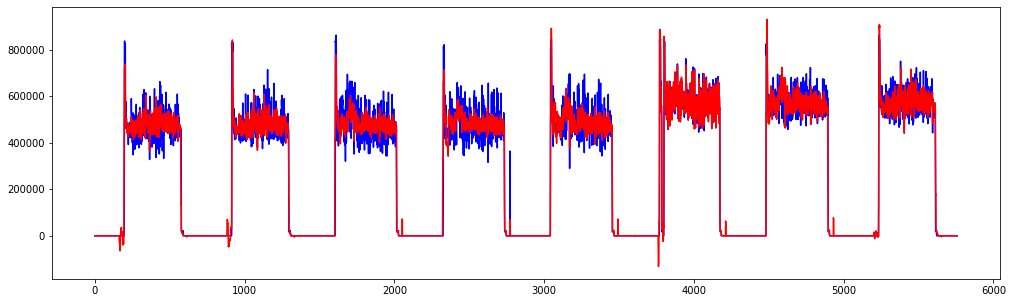

Кол-во чисел  4
(720, 8)


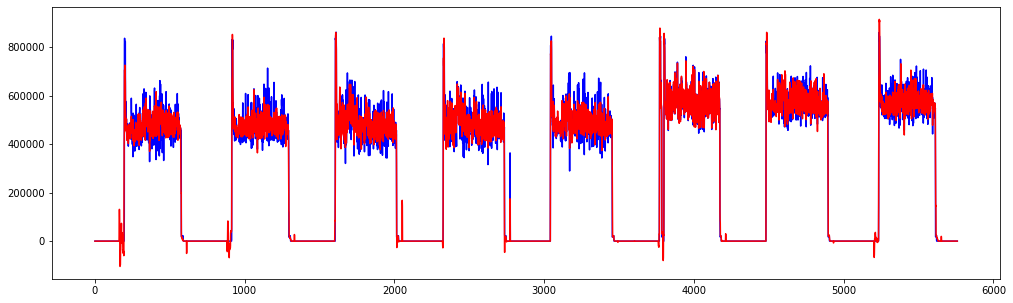

Кол-во чисел  5
(720, 8)


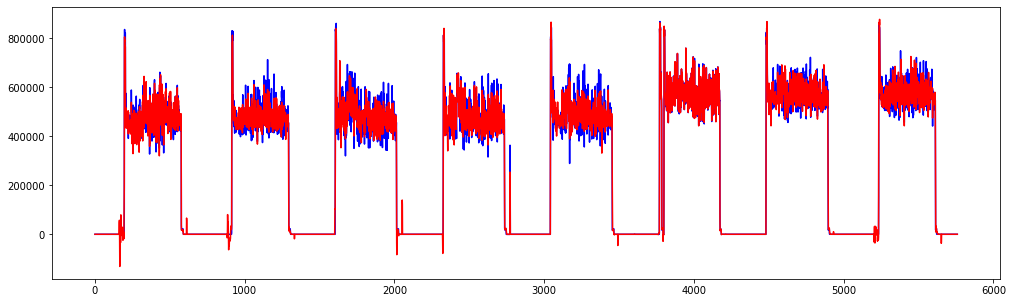

Кол-во чисел  6
(720, 8)


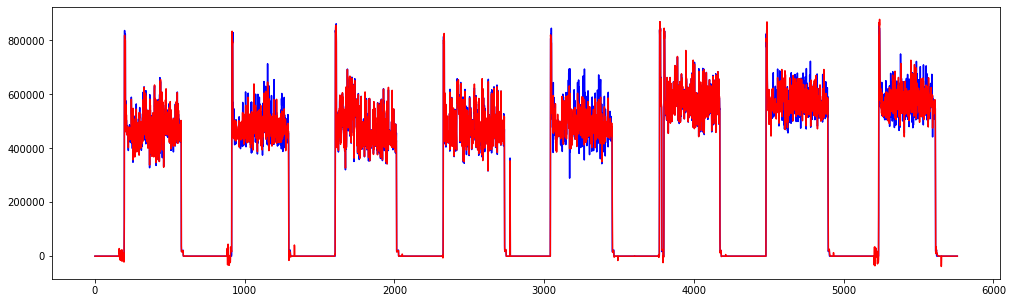

Кол-во чисел  7
(720, 8)


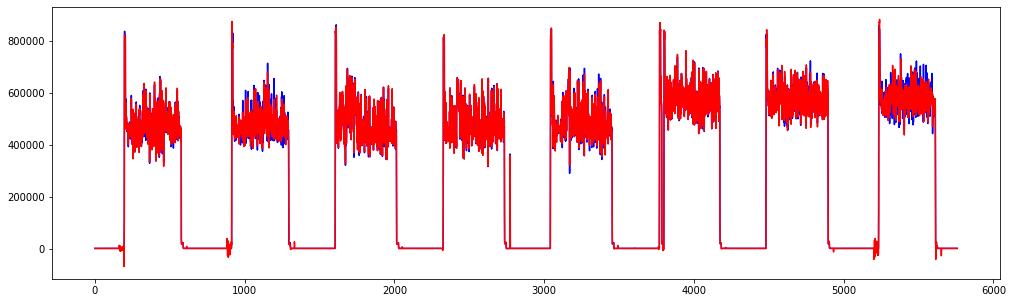

In [12]:
for i in range(1, len(S)):
    print('Кол-во чисел ', i)
    s = np.zeros((len(S), len(S)))
    for j in range(i):
        s[j, j] = S[j]
    #s[:i] += S[:i]
    t = np.arange(720 * 8)
    appr = U @ s @ Vt
    print(appr.shape)
    pred = np.zeros(appr.shape[0] * appr.shape[1])
    for j in range(appr.shape[1]):
        pred[j * 720: (j + 1) * 720 ] = appr[:, j]
    plt.figure(figsize=(17, 5))
    plt.plot(t, X, 'b')
    plt.plot(t, pred, 'r')
    plt.show()

## 1. Для матрицы A, сформированной только по нормальным данным, строишь разложение: A = U*S*Vt
## 2. Формируешь матрицу B по аномальным данным и получаешь матрицу X = U*Ut*B
## 3. Тогда для A модельными данными будут U*S*Vt, для B – матрица X.
## 4. Смотрим на разницу между реальными и модельными данными.

In [28]:
X = np.array(df[df.columns[2]])
X = X[109855 - 720 * 6: 109855]
y = np.array(df[df.columns[2]])
A = np.zeros((720, 6))
h = 0
for i in range(0, len(X), 720):
    for k, j in enumerate(X[i:i + 720]):
        A[k, h] = j   
    h += 1
    
U, S, Vt = np.linalg.svd(A, full_matrices=False)

s = np.zeros((len(S), len(S)))
for j in range(len(S)):
    s[j, j] = S[j]

In [29]:
A_ = U @ s @ Vt
print(U.shape, s.shape, Vt.shape)

(720, 6) (6, 6) (6, 6)


In [30]:
X = np.array(df[df.columns[2]])
X = X[109855: 109855 + 720 * 6]
y = np.array(df[df.columns[2]])
B = np.zeros((720, 6))
h = 0
for i in range(0, len(X), 720):
    for k, j in enumerate(X[i:i + 720]):
        B[k, h] = j   
    h += 1
    


In [31]:
X = U @ U.T @ B

In [38]:
norm_model = np.zeros(A_.shape[0] * A_.shape[1])
for j in range(A_.shape[1]):
    norm_model[j * 720: (j + 1) * 720 ] = A_[:, j]
    
anom_model = np.zeros(X.shape[0] * X.shape[1])
for j in range(X.shape[1]):
    anom_model[j * 720: (j + 1) * 720 ] = X[:, j]

In [39]:
X = np.array(df[df.columns[2]])
X_norm = X[109855 - 720 * 6: 109855]
X_anom = X[109855: 109855 + 720 * 6]

In [50]:
MAE(X_norm2, norm2_model)

34213.64441125657

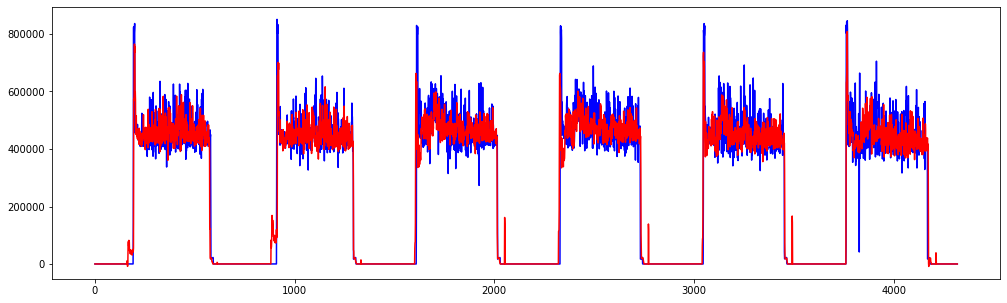

In [48]:
X = np.array(df[df.columns[2]])
X_norm2 = X[109855 - 720 * 12: 109855 - 720 * 6]
A_2 = np.zeros((720, 6))
h = 0
for i in range(0, len(X_norm2), 720):
    for k, j in enumerate(X_norm2[i:i + 720]):
        A_2[k, h] = j   
    h += 1
X_2 = U @ U.T @ A_2
norm2_model = np.zeros(X_2.shape[0] * X_2.shape[1])
for j in range(X_2.shape[1]):
    norm2_model[j * 720: (j + 1) * 720 ] = X_2[:, j]
    
t = np.arange(720 * 6)
plt.figure(figsize=(17, 5))
plt.plot(t, X_norm2, 'b')
plt.plot(t, norm2_model, 'r')
plt.show()

In [43]:
MAE(X_norm, norm_model)

2.0107488637085187e-10

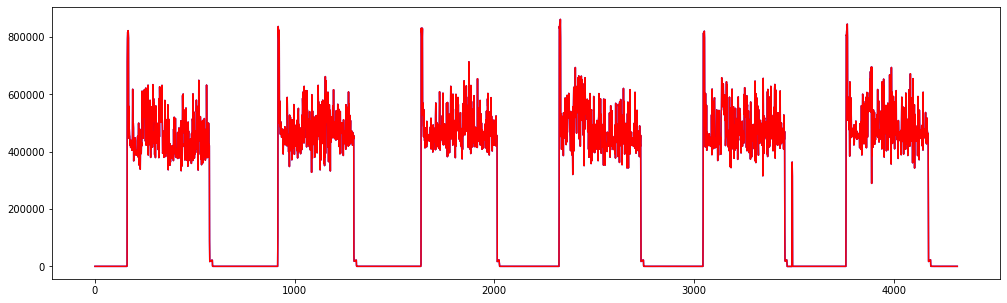

In [40]:
t = np.arange(720 * 6)
plt.figure(figsize=(17, 5))
plt.plot(t, X_norm, 'b')
plt.plot(t, norm_model, 'r')
plt.show()

In [44]:
MAE(X_anom, anom_model)

36558.097722292485

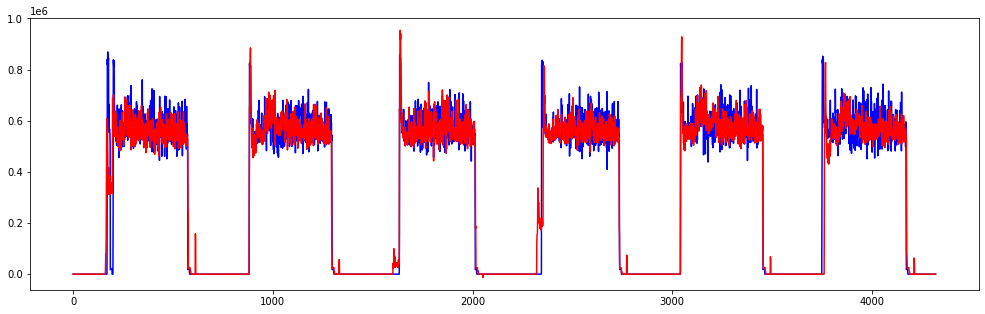

In [41]:
t = np.arange(720 * 6)
plt.figure(figsize=(17, 5))
plt.plot(t, X_anom, 'b')
plt.plot(t, anom_model, 'r')
plt.show()

### ARIMA - плохо
### SVR - плохо
### LSTM - попробовать

In [135]:
target_sensor = "total_AP_max"
features = list(df.columns.difference([target_sensor]))

forecast_lead = 15
target = f"{target_sensor}_lead{forecast_lead}"

df[target] = df[target_sensor].shift(-forecast_lead)
df = df.iloc[:-forecast_lead]

In [148]:
test_start = 109855 - 720 * 10
df_train = df.loc[test_start:109855 - 720].copy()
df_test = df.loc[109855 - 720:].copy()

In [149]:
y_test = np.array(df.total_AP_max[109855 - 720: ])

In [138]:
target_mean = df_train[target].mean()
target_stdev = df_train[target].std()
y_m = (y_test - target_mean) / stdev
for c in df_train.columns:
    mean = df_train[c].mean()
    stdev = df_train[c].std()

    df_train[c] = (df_train[c] - mean) / stdev
    df_test[c] = (df_test[c] - mean) / stdev

In [139]:
df_train.total_AP_max#_lead15

102655   -1.094659
102656   -1.094741
102657   -1.094576
102658   -1.094700
102659   -1.094700
            ...   
109131   -1.094700
109132   -1.094783
109133   -1.094700
109134   -1.094700
109135   -1.094700
Name: total_AP_max, Length: 6481, dtype: float64

In [140]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class SequenceDataset(Dataset):
    def __init__(self, dataframe, target, features, sequence_length=5):
        self.features = features
        self.target = target
        self.sequence_length = sequence_length
        self.y = torch.tensor(dataframe[target].values).float()
        self.X = torch.tensor(dataframe[features].values).float()

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i): 
        if i >= self.sequence_length - 1:
            i_start = i - self.sequence_length + 1
            x = self.X[i_start:(i + 1), :]
        else:
            padding = self.X[0].repeat(self.sequence_length - i - 1, 1)
            x = self.X[0:(i + 1), :]
            x = torch.cat((padding, x), 0)

        return x, self.y[i]

In [141]:
torch.manual_seed(101)

batch_size = 4
sequence_length = 30

features = ['humidity', 'minute', 'temperature', 'week_day']
train_dataset = SequenceDataset(
    df_train,
    target=target,
    features=features,
    sequence_length=sequence_length
)
print(target, features)
test_dataset = SequenceDataset(
    df_test,
    target=target,
    features=features,
    sequence_length=sequence_length
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

total_AP_max_lead15 ['humidity', 'minute', 'temperature', 'week_day']


In [142]:
from torch import nn

class ShallowRegressionLSTM(nn.Module):
    def __init__(self, num_sensors, hidden_units):
        super().__init__()
        self.num_sensors = num_sensors  # this is the number of features
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = nn.LSTM(
            input_size=num_sensors,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()

        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn[0]).flatten()  # First dim of Hn is num_layers, which is set to 1 above.

        return out

In [143]:
learning_rate = 5e-5
num_hidden_units = 16

model = ShallowRegressionLSTM(num_sensors=len(features), hidden_units=num_hidden_units)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [144]:
def train_model(data_loader, model, loss_function, optimizer):
    num_batches = len(data_loader)
    total_loss = 0
    model.train()

    for X, y in data_loader:
        output = model(X)
        loss = loss_function(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / num_batches
    print(f"Train loss: {avg_loss}")

def test_model(data_loader, model, loss_function):

    num_batches = len(data_loader)
    total_loss = 0

    model.eval()
    with torch.no_grad():
        for X, y in data_loader:
            output = model(X)
            total_loss += loss_function(output, y).item()

    avg_loss = total_loss / num_batches
    print(f"Test loss: {avg_loss}")


print("Untrained test\n--------")
test_model(test_loader, model, loss_function)
print()

for ix_epoch in range(50):
    print(f"Epoch {ix_epoch}\n---------")
    train_model(train_loader, model, loss_function, optimizer=optimizer)
    test_model(test_loader, model, loss_function)
    print()

Untrained test
--------
Test loss: 1.6477783443669538

Epoch 0
---------
Train loss: 0.9364033294341801
Test loss: 1.1581398680670048

Epoch 1
---------
Train loss: 0.5768088510525421
Test loss: 0.6617928832870061

Epoch 2
---------
Train loss: 0.4293439192642825
Test loss: 0.5470683619673179

Epoch 3
---------
Train loss: 0.39016655833793046
Test loss: 0.5163795250689657

Epoch 4
---------
Train loss: 0.36697670785818803
Test loss: 0.5001559123714492

Epoch 5
---------
Train loss: 0.344271574217802
Test loss: 0.47953894812637965

Epoch 6
---------
Train loss: 0.3229791807766428
Test loss: 0.4637107092191685

Epoch 7
---------
Train loss: 0.3022481762167218
Test loss: 0.44922778714266764

Epoch 8
---------
Train loss: 0.2799960505688433
Test loss: 0.4268640137739204

Epoch 9
---------
Train loss: 0.25804461692889347
Test loss: 0.41369638771482486

Epoch 10
---------
Train loss: 0.23859722788714535
Test loss: 0.40170537084531704

Epoch 11
---------
Train loss: 0.2202717039207276
Test lo

In [145]:
def predict(data_loader, model):

    output = torch.tensor([])
    model.eval()
    with torch.no_grad():
        for X, _ in data_loader:
            y_star = model(X)
            output = torch.cat((output, y_star), 0)

    return output

print(len(test_dataset))
train_eval_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

9195


In [146]:
pred = predict(train_eval_loader, model).numpy()
len(pred)

9195

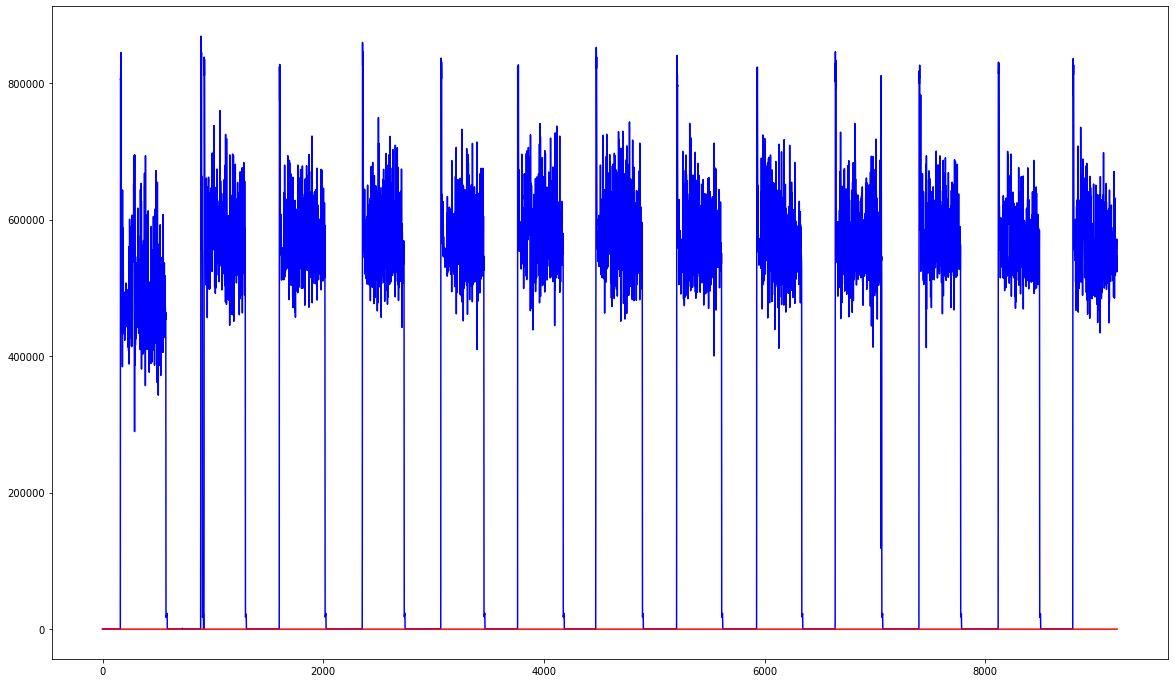

In [152]:
plt.figure(figsize=(20,12))
t = np.arange(len(pred))
plt.plot(t, y_test, 'b')
plt.plot(t, pred, 'r') # plotting t, a separately 
 # plotting t, b separately 
#plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

In [153]:
pred = pred * target_stdev + target_mean

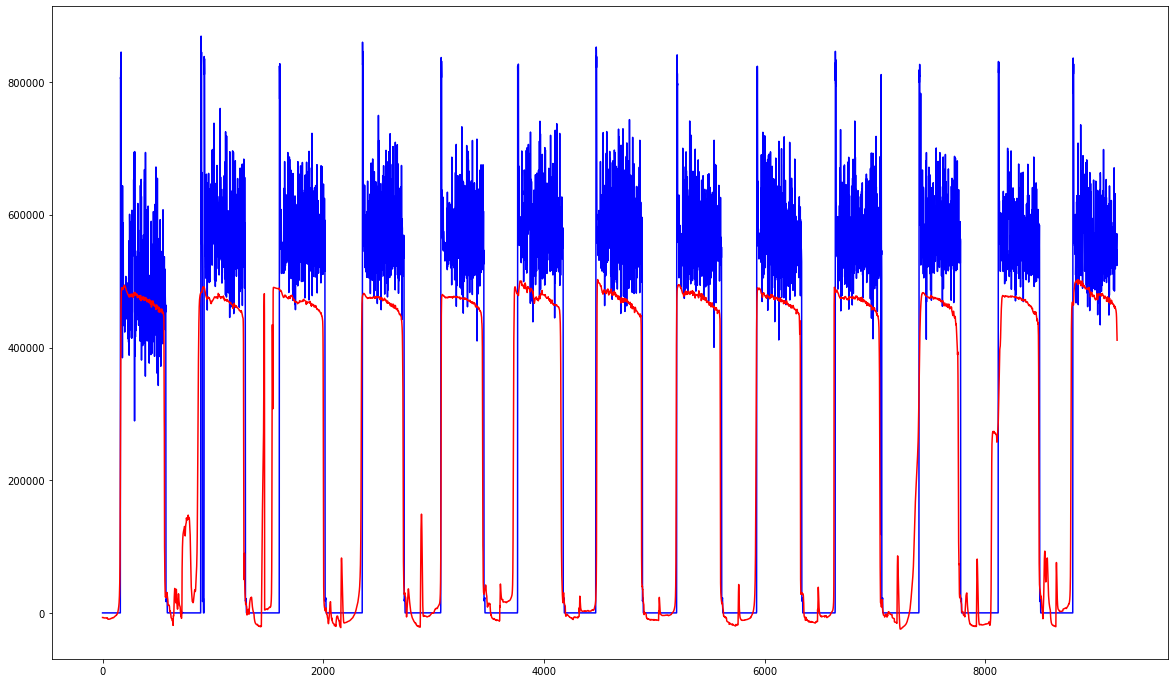

In [155]:
plt.figure(figsize=(20,12))
t = np.arange(len(pred))
plt.plot(t, y_test, 'b')
plt.plot(t, pred, 'r') # plotting t, a separately 
 # plotting t, b separately 
#plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

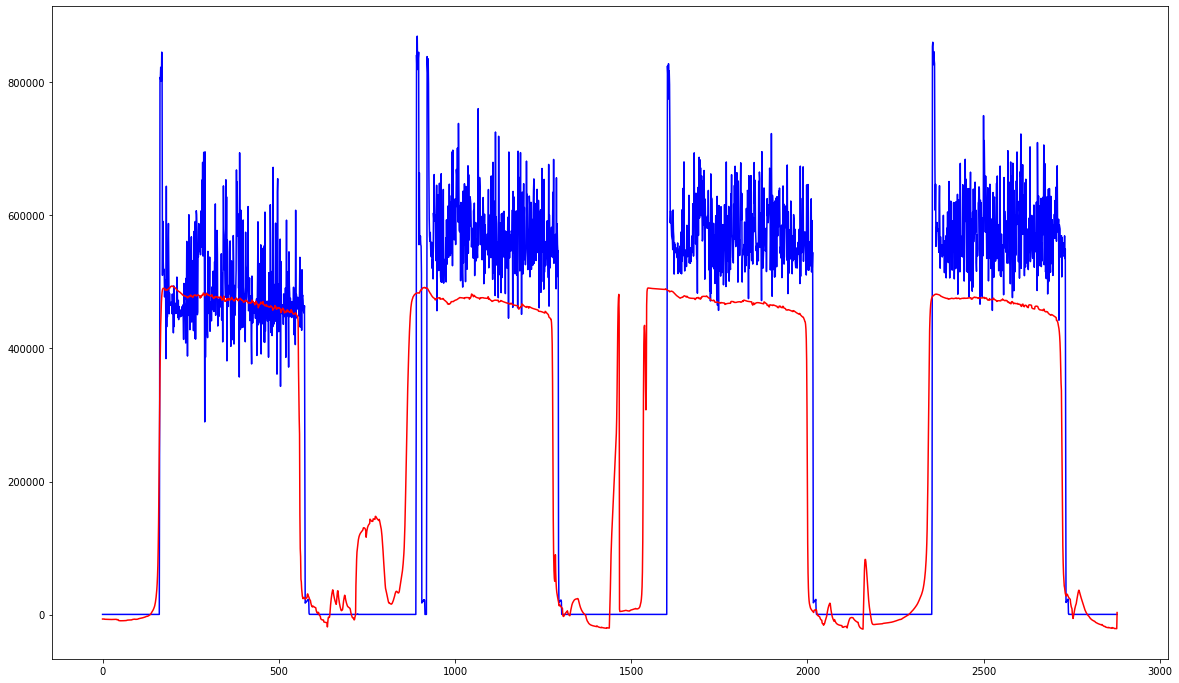

In [134]:
plt.figure(figsize=(20,12))
t = np.arange(len(pred) - 1)
plt.plot(t, y_m* target_stdev + target_mean, 'b')
plt.plot(t, pred[1:], 'r') # plotting t, a separately 
 # plotting t, b separately 
#plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

In [119]:
(pred - target_mean) / target_stdev

array([57.038357, 57.03837 , 57.038383, ..., 57.03845 , 57.03845 ,
       57.03845 ], dtype=float32)

In [59]:
ystar_col = "Model forecast"
df_train[ystar_col] = predict(train_eval_loader, model).numpy()
df_test[ystar_col] = predict(test_loader, model).numpy()

df_out = pd.concat((df_train, df_test))[[target, ystar_col]]

for c in df_out.columns:
    df_out[c] = df_out[c] * target_stdev + target_mean

print(df_out)

ValueError: Length of values (2161) does not match length of index (7201)